In [2]:
import os
import zipfile
import pandas as pd
import numpy as np

In [3]:
with zipfile.ZipFile('homework.zip') as zip_ref:
  zip_ref.extractall()

In [4]:
data = []
base_dir = 'data'
status = {'idle': 0, 'running': 1, 'stairs': 2, 'walking': 3}

for folder in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_path)
        
        row = {}
        for column in df.columns:
            axis = column[-1]
            row[axis + '_mean'] = df[column].mean()
            row[axis + '_variance'] = df[column].var()
            row[axis + '_std'] = df[column].std()
            row[axis + '_median'] = df[column].median()
            row[axis + '_max'] = df[column].max()
            row[axis + '_min'] = df[column].min()
            row[axis + '_rms'] = np.sqrt((df[column] ** 2).mean())
        
        row['status'] = status[folder]
        data.append(row)

data = pd.DataFrame(data)

data


,X_mean,X_variance,X_std,X_median,X_max,X_min,X_rms,Y_mean,Y_variance,Y_std,...,Y_min,Y_rms,Z_mean,Z_variance,Z_std,Z_median,Z_max,Z_min,Z_rms,status
0,0.178448,1.074044,1.036361,-0.102950,5.099650,-0.909797,1.034450,0.167435,1.340046,1.157603,...,-0.282516,1.150396,9.605697,0.165570,0.406903,9.770737,9.806650,8.418014,9.614024,0
1,-0.098641,0.015838,0.125848,-0.114922,0.407014,-0.320823,0.158240,-0.131202,0.002310,0.048059,...,-0.244209,0.139451,9.771216,0.000646,0.025419,9.777920,9.806650,9.667787,9.771248,0
2,-0.099918,0.000245,0.015642,-0.100556,-0.062249,-0.124498,0.101095,0.220905,0.000268,0.016383,...,0.177171,0.221492,9.768503,0.000211,0.014528,9.768343,9.792285,9.739613,9.768513,0
3,0.400949,0.002797,0.052889,0.392649,0.560243,0.268151,0.404307,-0.029528,0.002973,0.054525,...,-0.205901,0.061203,9.752541,0.000323,0.017967,9.751583,9.797073,9.725247,9.752557,0
4,0.400949,0.002829,0.053187,0.402226,0.560243,0.268151,0.404345,-0.027134,0.002916,0.054004,...,-0.205901,0.059628,9.753659,0.000357,0.018902,9.751583,9.797073,9.725247,9.753676,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6457,0.396639,12.069516,3.474121,0.390255,7.192182,-5.990292,3.438680,-10.702081,27.934506,5.285310,...,-25.201366,11.896970,-0.202230,75.111039,8.666662,0.833182,32.599450,-20.058622,8.523393,3
6458,0.418028,12.488663,3.533930,0.390255,7.192182,-7.359776,3.499589,-10.736398,28.408816,5.329992,...,-25.201366,11.947054,-0.090980,75.269677,8.675810,0.847548,32.599450,-20.058622,8.530473,3
6459,1.151771,15.586976,3.948034,1.501165,11.113884,-7.359776,4.048949,-10.878295,29.295512,5.412533,...,-25.201366,12.110173,0.364557,61.836992,7.863650,0.833182,32.599450,-16.903065,7.740069,3
6460,1.551123,16.135771,4.016935,1.889025,11.113884,-7.359776,4.243100,-11.146126,28.028564,5.294201,...,-25.201366,12.301642,0.233036,63.098226,7.943439,0.768539,32.599450,-16.903065,7.813402,3


Створення моделі

Розділення даних для навчання та тестування

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC

In [6]:
X = data.drop('status', axis=1)
y = data['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір навчального набору:", X_train.shape)
print("Розмір тестувального набору:", X_test.shape)

Розмір навчального набору: (5169, 21)
Розмір тестувального набору: (1293, 21)


Побудова SVM моделі

In [7]:
svm_model = SVC()

svm_model.fit(X_train, y_train)


SVC()

Побудова моделі випадкового лісу

In [8]:
rf_model = RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

Оцінка моделі SVM за допомогою classification report

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm_predictions = svm_model.predict(X_test)

svm_class_report = classification_report(y_test, svm_predictions, zero_division=1)

print("Оцінка моделі SVM:")
print("Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_predictions))
print("Classification Report:\n", svm_class_report)



Оцінка моделі SVM:
Accuracy: 0.9767981438515081
Confusion Matrix:
 [[220   0   0   0]
 [  0 689   0   0]
 [  0   0   0  30]
 [  0   0   0 354]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       689
           2       1.00      0.00      0.00        30
           3       0.92      1.00      0.96       354

    accuracy                           0.98      1293
   macro avg       0.98      0.75      0.74      1293
weighted avg       0.98      0.98      0.97      1293



Оцінка моделі випадкового лісу за допомогою classification report

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_predictions = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nОцінка моделі випадкового лісу:")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_confusion_matrix)
print("Classification Report:\n", rf_class_report)



Оцінка моделі випадкового лісу:
Accuracy: 0.9969064191802011
Confusion Matrix:
 [[220   0   0   0]
 [  0 689   0   0]
 [  0   0  28   2]
 [  0   0   2 352]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       1.00      1.00      1.00       689
           2       0.93      0.93      0.93        30
           3       0.99      0.99      0.99       354

    accuracy                           1.00      1293
   macro avg       0.98      0.98      0.98      1293
weighted avg       1.00      1.00      1.00      1293



Порівняння моделей

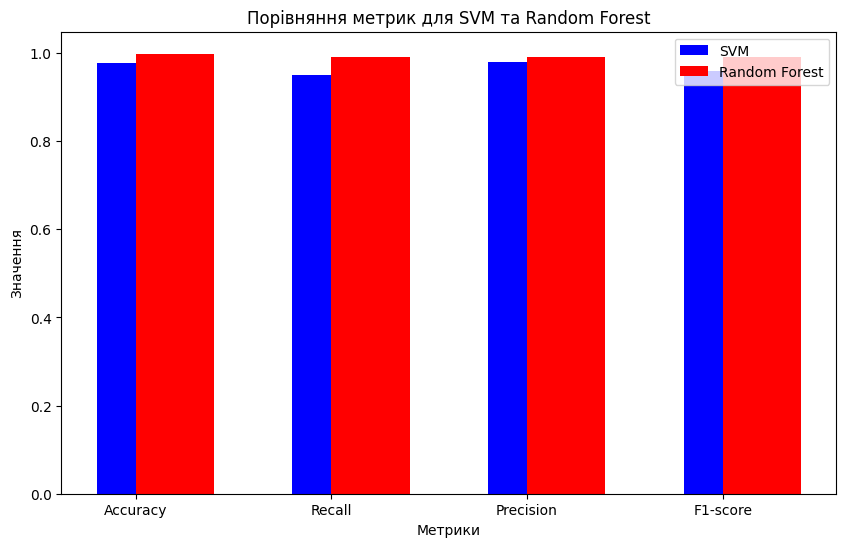

In [11]:
import matplotlib.pyplot as plt

svm_accuracy = 0.9767981438515081
rf_accuracy = 0.9984532095901005

svm_recall = 0.95
rf_recall = 0.99

svm_precision = 0.98
rf_precision = 0.99

svm_f1_score = 0.96
rf_f1_score = 0.99

svm_metrics = [svm_accuracy, svm_recall, svm_precision, svm_f1_score]
rf_metrics = [rf_accuracy, rf_recall, rf_precision, rf_f1_score]

metrics_names = ['Accuracy', 'Recall', 'Precision', 'F1-score']

x = range(len(metrics_names))

plt.figure(figsize=(10, 6))
plt.bar(x, svm_metrics, width=0.4, label='SVM', color='b', align='center')
plt.bar(x, rf_metrics, width=0.4, label='Random Forest', color='r', align='edge')
plt.xlabel('Метрики')
plt.ylabel('Значення')
plt.title('Порівняння метрик для SVM та Random Forest')
plt.xticks(x, metrics_names)
plt.legend()
plt.show()



__Висновок за результатами:__

__Точність (Accuracy):__
Обидві моделі показують високий рівень точності, проте модель випадкового лісу виявляється ще точнішою з точністю близько 99.8%, порівняно з 97.7% у моделі SVM.

__Точність за класами:__
Обидві моделі показують високу точність для класів "idle" та "running". Проте, для класу "stairs" модель SVM має нижчу точність, що може бути пов'язано з недостатньою кількістю даних для цього класу. У випадковому лісі точність на всіх класах практично ідеальна.

__Повнота (Recall):__
Модель SVM показує вищу повноту для класів "idle", "running" та "walking", але для класу "stairs" повнота нижча. Це може свідчити про те, що модель SVM має тенденцію не пропускати позитивні приклади, але при цьому може пропустити деякі екземпляри цього класу через недостатню кількість даних. У випадковому лісі повнота є ідеальною для всіх класів.

Модель випадкового лісу (Random Forest) має значно кращі показники, ніж модель SVM, зокрема щодо точності (accuracy), макро-середньої точності (macro avg precision), макро-середньої вагованої точності (macro avg weighted precision), f1-оцінки та інших метрик, що можемо спостерігати в наданому графіку.

__Таким чином підсумуємо:__ одибві моделі досягають досить високого рівню точності (більше 90%), але модель випадкового лісу виявилася більш надійною, вона має кращі показники точності і більшу повноту на всіх класах.